In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np

import osu.dataset as dataset


osu! path: C:\Users\niooi\AppData\Roaming/../Local/osu!


In [2]:
# reload from saved

xs = np.load(f'.datasets/xs_5000_07-21_23-28-07.npy')
ys = np.load(f'.datasets/ys_5000_07-21_23-28-07.npy')

# xs = np.load(f'.datasets/xs_142_07-21_21-50-55.npy')
# ys = np.load(f'.datasets/ys_142_07-21_21-50-55.npy')

In [3]:
import torch

BATCH_SIZE = 64

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
import torch
import gc

# Clear GPU cache
torch.cuda.empty_cache()

# Force garbage collection
gc.collect()

4512

In [13]:
from models.vae import OsuReplayVAE
from models.annealer import Annealer

annealer = Annealer(
    total_steps=10,
    range=(0, 0.44),
    cyclical=True,
    stay_max_steps=5
)

vae = OsuReplayVAE(batch_size=BATCH_SIZE, annealer=annealer, noise_std=0.045)

# vae = OsuReplayVAE.load(".trained/vae_most_recent.pt")

vae.load_data(xs, ys)

VAE models compiled..
VAE Models initialized on cuda (noise_std=0.045)
Encoder parameters: 234784
Decoder parameters: 147698
Data loaded: 14082 training samples, 3521 test samples (position only)


In [14]:
from models.keys import OsuKeyModel

keys = OsuKeyModel(batch_size=BATCH_SIZE)
keys.load_data(xs, ys)

Key Model initialized on cuda (noise_std=0.0)
Key model parameters: 54370
Data loaded: 14082 training samples, 3521 test samples (keys only)


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:21<00:00, 10.20it/s]


Epoch 1/3, Total: 3837.1888, Recon: 3837.1888, KL: 85.0562


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:22<00:00,  9.94it/s]


Epoch 2/3, Total: 1079.9986, Recon: 1073.6793, KL: 143.6183


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:22<00:00,  9.82it/s]


Epoch 3/3, Total: 880.7580, Recon: 869.0960, KL: 132.5223
VAE models saved to .trained/vae_2025-07-28_04-41-42.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:21<00:00, 10.27it/s]


Epoch 1/3, Total: 735.9547, Recon: 718.6307, KL: 131.2424


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 11.94it/s]


Epoch 2/3, Total: 714.5557, Recon: 693.1395, KL: 121.6833


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 688.9699, Recon: 663.2029, KL: 117.1229
VAE models saved to .trained/vae_2025-07-28_04-42-40.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 680.9220, Recon: 651.9065, KL: 109.9072


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 678.8522, Recon: 647.1400, KL: 102.9618


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 678.4662, Recon: 645.1791, KL: 94.5657
VAE models saved to .trained/vae_2025-07-28_04-43-34.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 673.4466, Recon: 638.6783, KL: 87.7988


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 669.1367, Recon: 633.2102, KL: 81.6513


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 668.1954, Recon: 635.2077, KL: 74.9720
VAE models saved to .trained/vae_2025-07-28_04-44-29.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 659.2317, Recon: 628.3169, KL: 70.2609


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 653.3936, Recon: 623.7511, KL: 67.3693


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.27it/s]


Epoch 3/3, Total: 650.4605, Recon: 622.6595, KL: 63.1841
VAE models saved to .trained/vae_2025-07-28_04-45-23.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.27it/s]


Epoch 1/3, Total: 610.0289, Recon: 610.0289, KL: 122.7502


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.27it/s]


Epoch 2/3, Total: 609.8374, Recon: 604.7226, KL: 116.2439


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.25it/s]


Epoch 3/3, Total: 615.8440, Recon: 607.4246, KL: 95.6744
VAE models saved to .trained/vae_2025-07-28_04-46-17.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 615.0225, Recon: 603.5700, KL: 86.7613


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 616.5785, Recon: 602.5540, KL: 79.6846


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 618.3151, Recon: 602.5212, KL: 71.7906
VAE models saved to .trained/vae_2025-07-28_04-47-12.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 617.7439, Recon: 600.2055, KL: 66.4332


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.26it/s]


Epoch 2/3, Total: 619.3394, Recon: 600.8658, KL: 59.9792


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:17<00:00, 12.29it/s]


Epoch 3/3, Total: 619.2380, Recon: 599.9967, KL: 54.6629
VAE models saved to .trained/vae_2025-07-28_04-48-06.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 619.5641, Recon: 600.7802, KL: 47.4340


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 618.1453, Recon: 599.6729, KL: 41.9828


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 613.5964, Recon: 596.8130, KL: 38.1443
VAE models saved to .trained/vae_2025-07-28_04-49-00.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 611.6135, Recon: 596.2249, KL: 34.9741


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 611.3188, Recon: 596.7902, KL: 33.0196


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 608.7795, Recon: 595.6926, KL: 29.7430
VAE models saved to .trained/vae_2025-07-28_04-49-55.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.25it/s]


Epoch 1/3, Total: 584.4753, Recon: 584.4753, KL: 92.2201


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 586.0859, Recon: 582.4388, KL: 82.8882


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 588.4205, Recon: 582.7426, KL: 64.5224
VAE models saved to .trained/vae_2025-07-28_04-50-49.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 589.0884, Recon: 581.6557, KL: 56.3083


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 591.4007, Recon: 582.9671, KL: 47.9179


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 592.2007, Recon: 582.3935, KL: 44.5782
VAE models saved to .trained/vae_2025-07-28_04-51-44.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 592.7707, Recon: 582.5956, KL: 38.5424


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 592.1767, Recon: 581.8930, KL: 33.3887


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.27it/s]


Epoch 3/3, Total: 594.1621, Recon: 583.3823, KL: 30.6242
VAE models saved to .trained/vae_2025-07-28_04-52-38.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 1/3, Total: 593.1787, Recon: 582.8374, KL: 26.1143


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.25it/s]


Epoch 2/3, Total: 592.3852, Recon: 582.6058, KL: 22.2259


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:17<00:00, 12.29it/s]


Epoch 3/3, Total: 589.9925, Recon: 581.2806, KL: 19.7998
VAE models saved to .trained/vae_2025-07-28_04-53-32.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 588.2019, Recon: 580.0049, KL: 18.6294


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 586.1844, Recon: 578.8693, KL: 16.6250


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 585.7924, Recon: 578.5278, KL: 16.5105
VAE models saved to .trained/vae_2025-07-28_04-54-27.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 1/3, Total: 573.6287, Recon: 573.6287, KL: 87.7578


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 573.0435, Recon: 570.3165, KL: 61.9770


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:17<00:00, 12.28it/s]


Epoch 3/3, Total: 576.4712, Recon: 572.1723, KL: 48.8514
VAE models saved to .trained/vae_2025-07-28_04-55-21.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 576.2814, Recon: 570.9081, KL: 40.7066


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 577.9847, Recon: 571.8426, KL: 34.8982


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 3/3, Total: 578.8948, Recon: 571.9156, KL: 31.7239
VAE models saved to .trained/vae_2025-07-28_04-56-16.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 578.1552, Recon: 571.3773, KL: 25.6740


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 577.6648, Recon: 570.7580, KL: 22.4248


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 579.6831, Recon: 572.9060, KL: 19.2531
VAE models saved to .trained/vae_2025-07-28_04-57-10.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 579.1112, Recon: 572.3196, KL: 17.1504


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 578.2942, Recon: 571.9718, KL: 14.3692


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 580.4676, Recon: 574.3312, KL: 13.9464
VAE models saved to .trained/vae_2025-07-28_04-58-05.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 578.4876, Recon: 572.3261, KL: 14.0034


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 576.1698, Recon: 571.5365, KL: 10.5301


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 575.8516, Recon: 570.7141, KL: 11.6761
VAE models saved to .trained/vae_2025-07-28_04-59-00.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 564.7238, Recon: 564.7238, KL: 59.3458


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 564.8775, Recon: 562.4963, KL: 54.1183


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 566.1238, Recon: 562.5407, KL: 40.7177
VAE models saved to .trained/vae_2025-07-28_04-59-54.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 567.7157, Recon: 563.0296, KL: 35.5009


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 566.9892, Recon: 561.7827, KL: 29.5819


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 568.3786, Recon: 562.7724, KL: 25.4827
VAE models saved to .trained/vae_2025-07-28_05-00-48.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 569.8612, Recon: 564.4757, KL: 20.3995


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 569.3048, Recon: 563.3997, KL: 19.1721


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 568.9006, Recon: 563.2456, KL: 16.0655
VAE models saved to .trained/vae_2025-07-28_05-01-43.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 571.7987, Recon: 566.0513, KL: 14.5137


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 569.0929, Recon: 564.5391, KL: 10.3497


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 568.7853, Recon: 564.2282, KL: 10.3568
VAE models saved to .trained/vae_2025-07-28_05-02-37.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 567.0863, Recon: 563.1060, KL: 9.0462


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 567.1512, Recon: 563.2814, KL: 8.7950


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 567.2367, Recon: 563.6154, KL: 8.2301
VAE models saved to .trained/vae_2025-07-28_05-03-32.pt


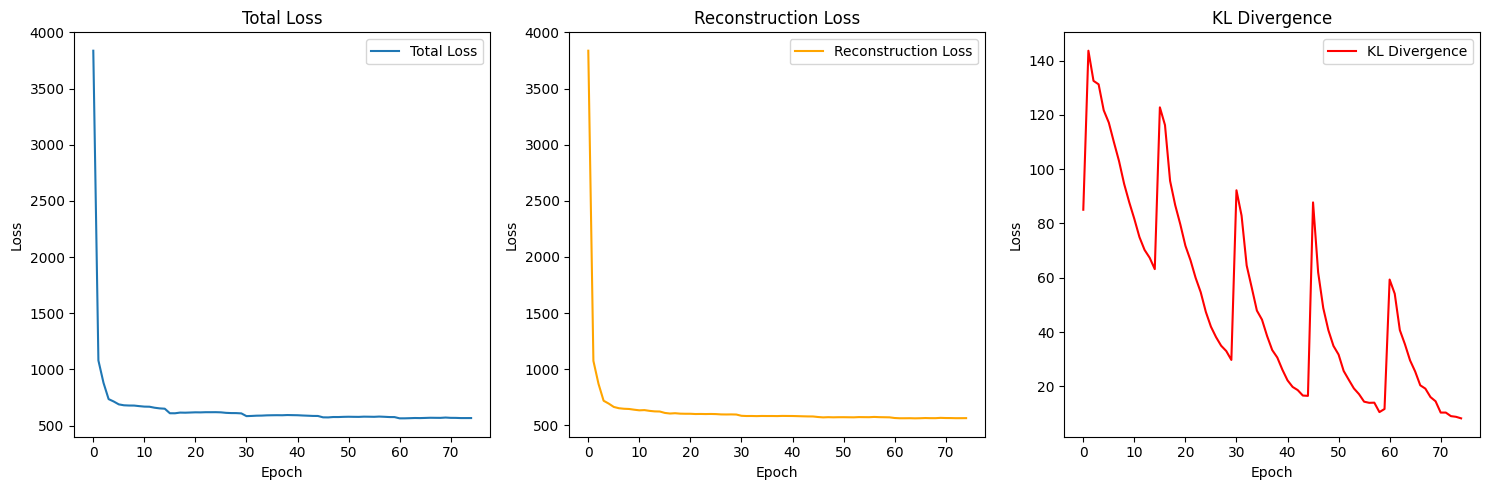

In [15]:
model = vae

EPOCHS = 3

for i in range(25):
    model.train(EPOCHS)
    model.save()
    
model.plot_losses()

Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 1/3, Total: 558.5389, Recon: 558.5389, KL: 65.4795


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 11.98it/s]


Epoch 2/3, Total: 557.7572, Recon: 555.5598, KL: 49.9398


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 3/3, Total: 557.4705, Recon: 554.2891, KL: 36.1519
VAE models saved to .trained/vae_2025-07-28_05-04-28.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 560.1842, Recon: 556.0873, KL: 31.0370


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 560.6983, Recon: 556.1427, KL: 25.8843


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 559.5671, Recon: 555.0826, KL: 20.3843
VAE models saved to .trained/vae_2025-07-28_05-05-22.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 560.2811, Recon: 555.3502, KL: 18.6776


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 563.3914, Recon: 559.0043, KL: 14.2441


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 561.3425, Recon: 557.2114, KL: 11.7361
VAE models saved to .trained/vae_2025-07-28_05-06-17.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 563.3350, Recon: 559.0091, KL: 10.9242


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 2/3, Total: 562.2058, Recon: 558.1285, KL: 9.2667


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 3/3, Total: 558.8802, Recon: 555.3338, KL: 8.0598
VAE models saved to .trained/vae_2025-07-28_05-07-11.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 561.0043, Recon: 557.4891, KL: 7.9891


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 561.2170, Recon: 557.9356, KL: 7.4577


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 558.3999, Recon: 555.7072, KL: 6.1199
VAE models saved to .trained/vae_2025-07-28_05-08-06.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 554.3562, Recon: 554.3562, KL: 49.2079


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 551.8212, Recon: 549.8147, KL: 45.6014


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 554.4079, Recon: 551.4893, KL: 33.1662
VAE models saved to .trained/vae_2025-07-28_05-09-00.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 554.4571, Recon: 550.9593, KL: 26.4989


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 554.7713, Recon: 550.5611, KL: 23.9212


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 554.8328, Recon: 550.8189, KL: 18.2450
VAE models saved to .trained/vae_2025-07-28_05-09-55.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 554.4999, Recon: 550.4840, KL: 15.2117


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 556.4595, Recon: 552.5092, KL: 12.8256


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 555.9767, Recon: 551.9980, KL: 11.3029
VAE models saved to .trained/vae_2025-07-28_05-10-50.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 554.3390, Recon: 550.8792, KL: 8.7368


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 554.0316, Recon: 550.8151, KL: 7.3103


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 551.8524, Recon: 548.7816, KL: 6.9790
VAE models saved to .trained/vae_2025-07-28_05-11-45.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 553.6697, Recon: 550.7099, KL: 6.7267


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 550.5406, Recon: 547.8947, KL: 6.0136


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 550.5960, Recon: 548.0427, KL: 5.8029
VAE models saved to .trained/vae_2025-07-28_05-12-39.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 543.8076, Recon: 543.8076, KL: 80.8773


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 542.7474, Recon: 540.6913, KL: 46.7289


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 544.9678, Recon: 542.3406, KL: 29.8545
VAE models saved to .trained/vae_2025-07-28_05-13-33.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 547.8506, Recon: 544.7151, KL: 23.7531


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 546.6769, Recon: 543.0957, KL: 20.3479


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 3/3, Total: 547.6390, Recon: 544.2511, KL: 15.3993
VAE models saved to .trained/vae_2025-07-28_05-14-28.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 1/3, Total: 548.7690, Recon: 545.1939, KL: 13.5419


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 547.6638, Recon: 544.0500, KL: 11.7331


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 548.7180, Recon: 545.5474, KL: 9.0076
VAE models saved to .trained/vae_2025-07-28_05-15-22.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 547.0136, Recon: 543.7965, KL: 8.1240


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 549.5929, Recon: 546.7259, KL: 6.5159


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 546.1551, Recon: 543.3525, KL: 6.3695
VAE models saved to .trained/vae_2025-07-28_05-16-17.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 545.4737, Recon: 542.9055, KL: 5.8370


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 544.3448, Recon: 542.1347, KL: 5.0228


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 543.7680, Recon: 541.7018, KL: 4.6958
VAE models saved to .trained/vae_2025-07-28_05-17-11.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 538.2214, Recon: 538.2214, KL: 53.6442


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 538.5423, Recon: 536.7107, KL: 41.6264


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 541.1661, Recon: 538.5582, KL: 29.6355
VAE models saved to .trained/vae_2025-07-28_05-18-06.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 539.3775, Recon: 536.5981, KL: 21.0560


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 543.5340, Recon: 539.9845, KL: 20.1672


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 542.7405, Recon: 539.3437, KL: 15.4399
VAE models saved to .trained/vae_2025-07-28_05-19-00.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 1/3, Total: 541.9224, Recon: 538.4816, KL: 13.0334


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 2/3, Total: 542.8038, Recon: 539.5277, KL: 10.6370


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 3/3, Total: 542.7753, Recon: 539.5798, KL: 9.0780
VAE models saved to .trained/vae_2025-07-28_05-19-55.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 542.5606, Recon: 539.5934, KL: 7.4930


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 541.8004, Recon: 538.9409, KL: 6.4989


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 540.6924, Recon: 538.2748, KL: 5.4945
VAE models saved to .trained/vae_2025-07-28_05-20-50.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 540.4277, Recon: 538.2376, KL: 4.9776


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 538.9383, Recon: 536.7190, KL: 5.0437


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 540.7070, Recon: 538.4764, KL: 5.0695
VAE models saved to .trained/vae_2025-07-28_05-21-45.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 533.3016, Recon: 533.3016, KL: 57.9242


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 534.7705, Recon: 532.9516, KL: 41.3378


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 538.4519, Recon: 535.8450, KL: 29.6245
VAE models saved to .trained/vae_2025-07-28_05-22-39.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 539.3195, Recon: 536.1404, KL: 24.0841


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 536.9299, Recon: 533.7322, KL: 18.1691


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 3/3, Total: 537.9446, Recon: 534.7649, KL: 14.4535
VAE models saved to .trained/vae_2025-07-28_05-23-34.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 539.3838, Recon: 536.0428, KL: 12.6554


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 537.9637, Recon: 534.6726, KL: 10.6851


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 539.0418, Recon: 536.1425, KL: 8.2366
VAE models saved to .trained/vae_2025-07-28_05-24-29.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 540.3819, Recon: 537.1359, KL: 8.1969


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 2/3, Total: 539.0944, Recon: 536.0778, KL: 6.8558


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 3/3, Total: 537.9685, Recon: 535.4245, KL: 5.7819
VAE models saved to .trained/vae_2025-07-28_05-25-23.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 1/3, Total: 539.9597, Recon: 537.1227, KL: 6.4476


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 536.5444, Recon: 534.2488, KL: 5.2172


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 536.5384, Recon: 534.3928, KL: 4.8765
VAE models saved to .trained/vae_2025-07-28_05-26-18.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 530.3319, Recon: 530.3319, KL: 51.2610


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 529.8547, Recon: 528.0080, KL: 41.9704


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 534.3775, Recon: 531.7491, KL: 29.8679
VAE models saved to .trained/vae_2025-07-28_05-27-13.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 533.1184, Recon: 530.1945, KL: 22.1510


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 533.1679, Recon: 529.9290, KL: 18.4029


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 535.2730, Recon: 531.5478, KL: 16.9328
VAE models saved to .trained/vae_2025-07-28_05-28-08.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 1/3, Total: 534.4216, Recon: 530.9617, KL: 13.1057


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 534.6915, Recon: 531.3447, KL: 10.8661


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 3/3, Total: 534.3605, Recon: 531.6062, KL: 7.8245
VAE models saved to .trained/vae_2025-07-28_05-29-03.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 533.8692, Recon: 531.0622, KL: 7.0883


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 535.7143, Recon: 533.1931, KL: 5.7299


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 532.8241, Recon: 530.1407, KL: 6.0988
VAE models saved to .trained/vae_2025-07-28_05-29-57.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 532.9301, Recon: 530.5021, KL: 5.5183


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 532.2822, Recon: 530.0337, KL: 5.1103


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 530.9959, Recon: 528.7017, KL: 5.2141
VAE models saved to .trained/vae_2025-07-28_05-30-52.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 529.1085, Recon: 529.1085, KL: 10.8030


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 528.2806, Recon: 527.2142, KL: 24.2357


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 527.7988, Recon: 525.4000, KL: 27.2584
VAE models saved to .trained/vae_2025-07-28_05-31-46.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 527.3413, Recon: 524.2608, KL: 23.3376


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 527.8782, Recon: 524.7271, KL: 17.9039


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 529.2368, Recon: 526.1025, KL: 14.2468
VAE models saved to .trained/vae_2025-07-28_05-32-41.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 528.0576, Recon: 524.8318, KL: 12.2190


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 529.4663, Recon: 526.3839, KL: 10.0077


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 532.1724, Recon: 529.1942, KL: 8.4607
VAE models saved to .trained/vae_2025-07-28_05-33-35.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 530.2298, Recon: 527.2822, KL: 7.4433


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 2/3, Total: 529.5095, Recon: 526.9265, KL: 5.8704


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 528.1009, Recon: 525.7554, KL: 5.3306
VAE models saved to .trained/vae_2025-07-28_05-34-30.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 529.3460, Recon: 526.9436, KL: 5.4600


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 530.0067, Recon: 527.8105, KL: 4.9915


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 526.8295, Recon: 524.6352, KL: 4.9870
VAE models saved to .trained/vae_2025-07-28_05-35-24.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 523.7807, Recon: 523.7807, KL: 10.8001


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 523.2763, Recon: 522.2058, KL: 24.3300


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 523.6337, Recon: 521.2880, KL: 26.6557
VAE models saved to .trained/vae_2025-07-28_05-36-19.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 524.1020, Recon: 521.0356, KL: 23.2302


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 2/3, Total: 525.9250, Recon: 522.6738, KL: 18.4727


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 527.1838, Recon: 523.7862, KL: 15.4437
VAE models saved to .trained/vae_2025-07-28_05-37-13.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 1/3, Total: 525.5586, Recon: 522.3661, KL: 12.0927


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 525.8248, Recon: 522.8700, KL: 9.5935


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 527.1011, Recon: 523.9819, KL: 8.8614
VAE models saved to .trained/vae_2025-07-28_05-38-08.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 527.1372, Recon: 523.9966, KL: 7.9309


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 526.0938, Recon: 523.6048, KL: 5.6568


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 525.6134, Recon: 523.2827, KL: 5.2971
VAE models saved to .trained/vae_2025-07-28_05-39-03.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 524.6486, Recon: 522.5887, KL: 4.6817


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 523.6631, Recon: 521.6146, KL: 4.6556


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 524.5886, Recon: 522.7617, KL: 4.1520
VAE models saved to .trained/vae_2025-07-28_05-39-57.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 519.6724, Recon: 519.6724, KL: 8.5205


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 518.2652, Recon: 517.3522, KL: 20.7501


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 519.6348, Recon: 517.5401, KL: 23.8039
VAE models saved to .trained/vae_2025-07-28_05-40-52.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 520.0517, Recon: 517.2817, KL: 20.9852


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 522.8144, Recon: 519.8169, KL: 17.0314


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 521.8039, Recon: 518.8674, KL: 13.3477
VAE models saved to .trained/vae_2025-07-28_05-41-46.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 523.5542, Recon: 520.2876, KL: 12.3735


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 524.4364, Recon: 521.4096, KL: 9.8273


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 522.8117, Recon: 520.0646, KL: 7.8043
VAE models saved to .trained/vae_2025-07-28_05-42-41.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 521.5857, Recon: 519.3701, KL: 5.5949


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 522.2337, Recon: 519.8057, KL: 5.5180


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 520.5898, Recon: 518.5116, KL: 4.7231
VAE models saved to .trained/vae_2025-07-28_05-43-35.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 519.0890, Recon: 517.1638, KL: 4.3755


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 521.4352, Recon: 519.5609, KL: 4.2598


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 520.2829, Recon: 518.3569, KL: 4.3773
VAE models saved to .trained/vae_2025-07-28_05-44-30.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 517.4810, Recon: 517.4810, KL: 10.0854


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 2/3, Total: 516.2749, Recon: 515.2997, KL: 22.1626


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 515.9158, Recon: 513.7657, KL: 24.4324
VAE models saved to .trained/vae_2025-07-28_05-45-25.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 517.1799, Recon: 514.4641, KL: 20.5744


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 518.2008, Recon: 515.2977, KL: 16.4948


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 518.7319, Recon: 515.7405, KL: 13.5969
VAE models saved to .trained/vae_2025-07-28_05-46-20.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 522.6495, Recon: 519.5135, KL: 11.8786


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 520.6341, Recon: 517.6922, KL: 9.5516


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 518.7195, Recon: 516.1136, KL: 7.4032
VAE models saved to .trained/vae_2025-07-28_05-47-14.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 518.5017, Recon: 516.2403, KL: 5.7106


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 518.9277, Recon: 516.7438, KL: 4.9636


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 518.9885, Recon: 516.8134, KL: 4.9434
VAE models saved to .trained/vae_2025-07-28_05-48-09.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 1/3, Total: 518.8898, Recon: 516.9526, KL: 4.4028


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 519.3982, Recon: 517.4593, KL: 4.4068


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 519.3125, Recon: 517.3280, KL: 4.5103
VAE models saved to .trained/vae_2025-07-28_05-49-03.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 1/3, Total: 514.8093, Recon: 514.8093, KL: 10.5562


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 513.3429, Recon: 512.3927, KL: 21.5951


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 514.5579, Recon: 512.3469, KL: 25.1258
VAE models saved to .trained/vae_2025-07-28_05-49-58.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 1/3, Total: 515.2046, Recon: 512.3929, KL: 21.3003


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 514.9509, Recon: 512.1170, KL: 16.1017


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 517.3985, Recon: 514.5789, KL: 12.8162
VAE models saved to .trained/vae_2025-07-28_05-50-53.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 516.9184, Recon: 514.0465, KL: 10.8787


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 517.1839, Recon: 514.6040, KL: 8.3763


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 516.2245, Recon: 513.9565, KL: 6.4430
VAE models saved to .trained/vae_2025-07-28_05-51-47.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 517.2321, Recon: 514.6835, KL: 6.4358


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 515.9334, Recon: 513.7196, KL: 5.0315


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 516.1036, Recon: 514.2561, KL: 4.1988
VAE models saved to .trained/vae_2025-07-28_05-52-42.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 1/3, Total: 516.7225, Recon: 514.8228, KL: 4.3176


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 2/3, Total: 515.5315, Recon: 513.7035, KL: 4.1545


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 3/3, Total: 516.7524, Recon: 515.1113, KL: 3.7298
VAE models saved to .trained/vae_2025-07-28_05-53-37.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 514.2257, Recon: 514.2257, KL: 10.2886


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 513.5511, Recon: 512.4734, KL: 24.4931


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 511.5946, Recon: 509.2243, KL: 26.9350
VAE models saved to .trained/vae_2025-07-28_05-54-32.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 513.1684, Recon: 510.2629, KL: 22.0110


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 512.8508, Recon: 509.9608, KL: 16.4201


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 513.9288, Recon: 511.2229, KL: 12.2995
VAE models saved to .trained/vae_2025-07-28_05-55-26.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 513.2051, Recon: 510.5893, KL: 9.9083


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 2/3, Total: 514.2846, Recon: 511.7677, KL: 8.1717


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 514.7660, Recon: 512.3888, KL: 6.7534
VAE models saved to .trained/vae_2025-07-28_05-56-21.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 512.9579, Recon: 510.6568, KL: 5.8108


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 2/3, Total: 514.0384, Recon: 512.1288, KL: 4.3401


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 513.4602, Recon: 511.8742, KL: 3.6044
VAE models saved to .trained/vae_2025-07-28_05-57-15.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.25it/s]


Epoch 1/3, Total: 515.1953, Recon: 513.2899, KL: 4.3306


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 516.2018, Recon: 514.2852, KL: 4.3558


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 513.1668, Recon: 511.2680, KL: 4.3154
VAE models saved to .trained/vae_2025-07-28_05-58-10.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 1/3, Total: 511.0481, Recon: 511.0481, KL: 10.4107


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 2/3, Total: 509.3524, Recon: 508.3112, KL: 23.6625


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 510.7821, Recon: 508.5312, KL: 25.5789
VAE models saved to .trained/vae_2025-07-28_05-59-05.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 510.7629, Recon: 508.0707, KL: 20.3955


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 510.9022, Recon: 508.2444, KL: 15.1009


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 511.6969, Recon: 509.0950, KL: 11.8266
VAE models saved to .trained/vae_2025-07-28_06-00-00.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 1/3, Total: 510.8180, Recon: 508.2635, KL: 9.6761


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 512.6599, Recon: 510.1198, KL: 8.2473


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 511.6020, Recon: 509.2947, KL: 6.5549
VAE models saved to .trained/vae_2025-07-28_06-00-54.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 511.8931, Recon: 509.7036, KL: 5.5292


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 511.9016, Recon: 509.7939, KL: 4.7903


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 3/3, Total: 512.4041, Recon: 510.5672, KL: 4.1749
VAE models saved to .trained/vae_2025-07-28_06-01-49.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 1/3, Total: 510.7879, Recon: 509.1199, KL: 3.7911


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 511.8832, Recon: 510.0488, KL: 4.1691


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 509.2619, Recon: 507.7973, KL: 3.3288
VAE models saved to .trained/vae_2025-07-28_06-02-44.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 507.6911, Recon: 507.6911, KL: 9.5410


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 508.1035, Recon: 507.0499, KL: 23.9444


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 507.5259, Recon: 505.3583, KL: 24.6321
VAE models saved to .trained/vae_2025-07-28_06-03-39.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 507.8220, Recon: 505.2432, KL: 19.5362


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 508.2849, Recon: 505.6028, KL: 15.2394


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 510.2404, Recon: 507.6736, KL: 11.6675
VAE models saved to .trained/vae_2025-07-28_06-04-33.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 510.9227, Recon: 508.2040, KL: 10.2982


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 510.1535, Recon: 507.7254, KL: 7.8835


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 509.7012, Recon: 507.4355, KL: 6.4366
VAE models saved to .trained/vae_2025-07-28_06-05-28.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 510.0449, Recon: 508.1365, KL: 4.8192


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 510.1093, Recon: 508.3866, KL: 3.9152


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 509.1572, Recon: 507.4241, KL: 3.9388
VAE models saved to .trained/vae_2025-07-28_06-06-22.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 509.8616, Recon: 508.1534, KL: 3.8822


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 511.3064, Recon: 509.8173, KL: 3.3843


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 510.3052, Recon: 508.7318, KL: 3.5759
VAE models saved to .trained/vae_2025-07-28_06-07-17.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 507.0096, Recon: 507.0096, KL: 9.0929


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 504.5714, Recon: 503.6623, KL: 20.6614


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 506.1991, Recon: 504.2121, KL: 22.5788
VAE models saved to .trained/vae_2025-07-28_06-08-11.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 507.7842, Recon: 505.2141, KL: 19.4709


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 506.5125, Recon: 503.8386, KL: 15.1925


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 505.8634, Recon: 503.5122, KL: 10.6874
VAE models saved to .trained/vae_2025-07-28_06-09-06.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 508.5719, Recon: 506.1023, KL: 9.3547


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 507.2506, Recon: 504.8770, KL: 7.7065


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 508.5264, Recon: 506.3016, KL: 6.3206
VAE models saved to .trained/vae_2025-07-28_06-10-01.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 508.1837, Recon: 506.1353, KL: 5.1726


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 507.6452, Recon: 505.8888, KL: 3.9918


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 508.1719, Recon: 506.4009, KL: 4.0250
VAE models saved to .trained/vae_2025-07-28_06-10-56.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 507.1171, Recon: 505.5212, KL: 3.6269


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 505.5309, Recon: 504.3006, KL: 2.7962


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 507.4927, Recon: 506.0719, KL: 3.2290
VAE models saved to .trained/vae_2025-07-28_06-11-50.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 504.2165, Recon: 504.2165, KL: 9.5611


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 503.0394, Recon: 502.0742, KL: 21.9358


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 504.2392, Recon: 502.1719, KL: 23.4914
VAE models saved to .trained/vae_2025-07-28_06-12-44.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 505.5657, Recon: 503.0487, KL: 19.0682


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 505.6343, Recon: 502.8231, KL: 15.9728


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 505.9783, Recon: 503.5225, KL: 11.1631
VAE models saved to .trained/vae_2025-07-28_06-13-39.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 506.6527, Recon: 504.1049, KL: 9.6509


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 506.1577, Recon: 503.8772, KL: 7.4045


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 506.1058, Recon: 503.9085, KL: 6.2423
VAE models saved to .trained/vae_2025-07-28_06-14-34.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 507.1000, Recon: 505.0330, KL: 5.2196


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 506.4259, Recon: 504.4868, KL: 4.4071


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 507.7684, Recon: 506.1519, KL: 3.6738
VAE models saved to .trained/vae_2025-07-28_06-15-28.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 506.4782, Recon: 504.9142, KL: 3.5547


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 506.9919, Recon: 505.3798, KL: 3.6638


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 506.0403, Recon: 504.4967, KL: 3.5082
VAE models saved to .trained/vae_2025-07-28_06-16-23.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 502.1895, Recon: 502.1895, KL: 8.1525


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 502.5336, Recon: 501.6366, KL: 20.3876


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 502.7072, Recon: 500.6727, KL: 23.1192
VAE models saved to .trained/vae_2025-07-28_06-17-18.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 502.6036, Recon: 500.0853, KL: 19.0781


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 504.1704, Recon: 501.6921, KL: 14.0814


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 504.8350, Recon: 502.3147, KL: 11.4555
VAE models saved to .trained/vae_2025-07-28_06-18-12.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 503.5260, Recon: 501.3071, KL: 8.4049


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 504.8496, Recon: 502.7745, KL: 6.7374


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 504.1609, Recon: 502.2245, KL: 5.5012
VAE models saved to .trained/vae_2025-07-28_06-19-07.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 503.9445, Recon: 502.2736, KL: 4.2195


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 505.3429, Recon: 503.5181, KL: 4.1473


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 503.4571, Recon: 502.0095, KL: 3.2898
VAE models saved to .trained/vae_2025-07-28_06-20-01.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 504.1028, Recon: 502.6671, KL: 3.2629


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 2/3, Total: 503.9173, Recon: 502.4718, KL: 3.2852


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 503.8959, Recon: 502.5318, KL: 3.1002
VAE models saved to .trained/vae_2025-07-28_06-20-56.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 499.8769, Recon: 499.8769, KL: 9.4540


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 500.1115, Recon: 499.1433, KL: 22.0058


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 501.1897, Recon: 499.1297, KL: 23.4088
VAE models saved to .trained/vae_2025-07-28_06-21-51.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 502.1847, Recon: 499.7317, KL: 18.5840


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 2/3, Total: 501.9575, Recon: 499.4589, KL: 14.1962


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 502.1111, Recon: 499.8391, KL: 10.3270
VAE models saved to .trained/vae_2025-07-28_06-22-46.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 503.7785, Recon: 501.4699, KL: 8.7449


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 11.95it/s]


Epoch 2/3, Total: 502.0083, Recon: 499.8703, KL: 6.9413


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 502.9024, Recon: 500.8713, KL: 5.7700
VAE models saved to .trained/vae_2025-07-28_06-23-41.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 503.2755, Recon: 501.3809, KL: 4.7844


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 503.0686, Recon: 501.2579, KL: 4.1152


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 504.4608, Recon: 502.6537, KL: 4.1071
VAE models saved to .trained/vae_2025-07-28_06-24-35.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 502.2063, Recon: 500.6527, KL: 3.5309


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 500.9363, Recon: 499.6339, KL: 2.9600


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 503.0164, Recon: 501.7201, KL: 2.9462
VAE models saved to .trained/vae_2025-07-28_06-25-30.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 500.4441, Recon: 500.4441, KL: 9.1470


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 498.1405, Recon: 497.2680, KL: 19.8305


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 500.8287, Recon: 498.8497, KL: 22.4884
VAE models saved to .trained/vae_2025-07-28_06-26-25.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 500.8305, Recon: 498.3745, KL: 18.6058


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 500.6208, Recon: 498.1913, KL: 13.8036


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 502.7967, Recon: 500.3880, KL: 10.9487
VAE models saved to .trained/vae_2025-07-28_06-27-19.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 501.1286, Recon: 498.7366, KL: 9.0607


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 502.8136, Recon: 500.5497, KL: 7.3503


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 3/3, Total: 501.7517, Recon: 499.7518, KL: 5.6815
VAE models saved to .trained/vae_2025-07-28_06-28-14.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 500.6181, Recon: 498.8611, KL: 4.4370


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 502.6916, Recon: 500.7216, KL: 4.4772


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 501.6158, Recon: 499.9687, KL: 3.7434
VAE models saved to .trained/vae_2025-07-28_06-29-09.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 502.0937, Recon: 500.4770, KL: 3.6742


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 500.6862, Recon: 499.2372, KL: 3.2934


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 500.6578, Recon: 499.2534, KL: 3.1918
VAE models saved to .trained/vae_2025-07-28_06-30-03.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 496.9057, Recon: 496.9057, KL: 10.8667


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 496.2257, Recon: 495.2033, KL: 23.2353


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 496.8614, Recon: 494.8704, KL: 22.6247
VAE models saved to .trained/vae_2025-07-28_06-30-57.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 499.0661, Recon: 496.8016, KL: 17.1549


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 498.3885, Recon: 496.1499, KL: 12.7193


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 501.1888, Recon: 498.8529, KL: 10.6174
VAE models saved to .trained/vae_2025-07-28_06-31-52.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 500.5313, Recon: 498.1146, KL: 9.1544


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 500.9717, Recon: 498.6818, KL: 7.4349


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 499.5125, Recon: 497.4296, KL: 5.9173
VAE models saved to .trained/vae_2025-07-28_06-32-47.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 500.8353, Recon: 498.9933, KL: 4.6517


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 503.0241, Recon: 500.8464, KL: 4.9493


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 499.6534, Recon: 498.0081, KL: 3.7394
VAE models saved to .trained/vae_2025-07-28_06-33-41.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 502.3334, Recon: 500.7037, KL: 3.7040


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 501.0921, Recon: 499.6307, KL: 3.3214


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 501.2260, Recon: 499.7682, KL: 3.3131
VAE models saved to .trained/vae_2025-07-28_06-34-36.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 495.9247, Recon: 495.9247, KL: 11.4396


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 495.9440, Recon: 494.9080, KL: 23.5452


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 496.9156, Recon: 494.9027, KL: 22.8733
VAE models saved to .trained/vae_2025-07-28_06-35-30.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 497.3772, Recon: 495.0845, KL: 17.3691


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 2/3, Total: 497.2421, Recon: 494.9481, KL: 13.0336


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 3/3, Total: 497.7972, Recon: 495.5167, KL: 10.3659
VAE models saved to .trained/vae_2025-07-28_06-36-26.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 1/3, Total: 498.8185, Recon: 496.7103, KL: 7.9855


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 498.1533, Recon: 496.1803, KL: 6.4061


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 499.5088, Recon: 497.5070, KL: 5.6871
VAE models saved to .trained/vae_2025-07-28_06-37-20.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 1/3, Total: 499.6657, Recon: 497.6845, KL: 5.0031


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 499.3096, Recon: 497.7091, KL: 3.6377


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 498.9702, Recon: 497.4239, KL: 3.5143
VAE models saved to .trained/vae_2025-07-28_06-38-15.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 498.4464, Recon: 497.1541, KL: 2.9371


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 498.7118, Recon: 497.3899, KL: 3.0043


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 499.0612, Recon: 497.6859, KL: 3.1256
VAE models saved to .trained/vae_2025-07-28_06-39-09.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 495.8789, Recon: 495.8789, KL: 11.5451


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 494.1915, Recon: 493.0810, KL: 25.2402


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 494.7680, Recon: 492.6838, KL: 23.6844
VAE models saved to .trained/vae_2025-07-28_06-40-04.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 496.2357, Recon: 493.9123, KL: 17.6014


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 496.2032, Recon: 493.9036, KL: 13.0659


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 497.1106, Recon: 495.0813, KL: 9.2243
VAE models saved to .trained/vae_2025-07-28_06-40-59.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 497.8429, Recon: 495.6104, KL: 8.4563


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 500.3825, Recon: 498.2605, KL: 6.8896


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 498.4003, Recon: 496.4944, KL: 5.4146
VAE models saved to .trained/vae_2025-07-28_06-41-53.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 500.3025, Recon: 498.4936, KL: 4.5679


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 498.8110, Recon: 497.0064, KL: 4.1013


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 499.6820, Recon: 498.0701, KL: 3.6634
VAE models saved to .trained/vae_2025-07-28_06-42-48.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 498.4720, Recon: 496.9333, KL: 3.4969


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 499.4927, Recon: 497.8430, KL: 3.7494


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 497.8515, Recon: 496.1942, KL: 3.7665
VAE models saved to .trained/vae_2025-07-28_06-43-43.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 496.5309, Recon: 496.5309, KL: 7.7724


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 493.9778, Recon: 493.2199, KL: 17.2248


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 494.8666, Recon: 493.0632, KL: 20.4930
VAE models saved to .trained/vae_2025-07-28_06-44-37.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 494.9518, Recon: 492.5773, KL: 17.9884


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 2/3, Total: 495.8860, Recon: 493.4006, KL: 14.1214


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 496.4634, Recon: 494.1378, KL: 10.5709
VAE models saved to .trained/vae_2025-07-28_06-45-32.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 496.5116, Recon: 494.3054, KL: 8.3567


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 497.9317, Recon: 495.8270, KL: 6.8333


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 496.9275, Recon: 494.8283, KL: 5.9634
VAE models saved to .trained/vae_2025-07-28_06-46-27.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 498.7678, Recon: 497.0215, KL: 4.4097


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 497.5394, Recon: 495.8065, KL: 3.9385


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 500.1120, Recon: 498.4921, KL: 3.6817
VAE models saved to .trained/vae_2025-07-28_06-47-21.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 497.8441, Recon: 496.3681, KL: 3.3545


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 495.9059, Recon: 494.4092, KL: 3.4015


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 497.4742, Recon: 496.0346, KL: 3.2719
VAE models saved to .trained/vae_2025-07-28_06-48-16.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 493.4619, Recon: 493.4619, KL: 9.3531


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 491.9193, Recon: 491.0067, KL: 20.7410


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 493.0720, Recon: 491.1367, KL: 21.9917
VAE models saved to .trained/vae_2025-07-28_06-49-10.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 493.9143, Recon: 491.6122, KL: 17.4402


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 494.1996, Recon: 491.9600, KL: 12.7247


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 494.4323, Recon: 492.2969, KL: 9.7067
VAE models saved to .trained/vae_2025-07-28_06-50-05.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 494.5931, Recon: 492.5732, KL: 7.6513


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 494.6615, Recon: 492.7404, KL: 6.2373


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 495.7357, Recon: 493.9057, KL: 5.1989
VAE models saved to .trained/vae_2025-07-28_06-51-00.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 497.1363, Recon: 495.2609, KL: 4.7357


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 496.6600, Recon: 495.1231, KL: 3.4929


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 496.9403, Recon: 495.2471, KL: 3.8482
VAE models saved to .trained/vae_2025-07-28_06-51-55.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 496.2336, Recon: 495.0112, KL: 2.7783


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 496.2718, Recon: 494.7912, KL: 3.3649


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 494.6703, Recon: 493.3331, KL: 3.0390
VAE models saved to .trained/vae_2025-07-28_06-52-49.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 492.6331, Recon: 492.6331, KL: 8.3386


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 491.0781, Recon: 490.2791, KL: 18.1607


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 493.0768, Recon: 491.2639, KL: 20.6007
VAE models saved to .trained/vae_2025-07-28_06-53-44.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 493.7946, Recon: 491.5389, KL: 17.0885


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 493.1415, Recon: 490.8171, KL: 13.2070


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 493.6252, Recon: 491.5148, KL: 9.5926
VAE models saved to .trained/vae_2025-07-28_06-54-39.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 493.1464, Recon: 491.2132, KL: 7.3227


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 494.5089, Recon: 492.5212, KL: 6.4536


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 494.7415, Recon: 492.6978, KL: 5.8060
VAE models saved to .trained/vae_2025-07-28_06-55-33.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 494.7280, Recon: 493.0595, KL: 4.2133


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 494.9461, Recon: 493.2691, KL: 3.8113


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 495.5180, Recon: 494.1593, KL: 3.0880
VAE models saved to .trained/vae_2025-07-28_06-56-28.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 497.4099, Recon: 495.8319, KL: 3.5863


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 497.9077, Recon: 496.4100, KL: 3.4038


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 495.5386, Recon: 494.0382, KL: 3.4099
VAE models saved to .trained/vae_2025-07-28_06-57-23.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 491.5547, Recon: 491.5547, KL: 11.6322


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 489.5436, Recon: 488.5405, KL: 22.7985


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 492.1951, Recon: 490.1423, KL: 23.3279
VAE models saved to .trained/vae_2025-07-28_06-58-18.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 492.3326, Recon: 489.9640, KL: 17.9436


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 494.1466, Recon: 491.5988, KL: 14.4758


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 492.0202, Recon: 489.7251, KL: 10.4320
VAE models saved to .trained/vae_2025-07-28_06-59-12.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 493.6550, Recon: 491.5643, KL: 7.9193


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 494.1064, Recon: 492.1077, KL: 6.4891


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 493.1402, Recon: 491.3606, KL: 5.0558
VAE models saved to .trained/vae_2025-07-28_07-00-07.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 494.2399, Recon: 492.4219, KL: 4.5909


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 493.4974, Recon: 492.0894, KL: 3.1998


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 493.1902, Recon: 491.6851, KL: 3.4208
VAE models saved to .trained/vae_2025-07-28_07-01-01.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 493.5756, Recon: 492.0996, KL: 3.3546


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 493.2772, Recon: 492.0422, KL: 2.8069


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 492.8444, Recon: 491.5874, KL: 2.8568
VAE models saved to .trained/vae_2025-07-28_07-01-56.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 489.3564, Recon: 489.3564, KL: 11.5443


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 489.7922, Recon: 488.6906, KL: 25.0371


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 489.7163, Recon: 487.6665, KL: 23.2927
VAE models saved to .trained/vae_2025-07-28_07-02-51.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 490.8012, Recon: 488.6341, KL: 16.4174


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 491.6137, Recon: 489.4561, KL: 12.2593


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 492.4679, Recon: 490.3309, KL: 9.7137
VAE models saved to .trained/vae_2025-07-28_07-03-45.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 493.1654, Recon: 491.1032, KL: 7.8114


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 492.5261, Recon: 490.6200, KL: 6.1887


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 490.7360, Recon: 489.3893, KL: 3.8259
VAE models saved to .trained/vae_2025-07-28_07-04-40.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 493.3796, Recon: 491.7389, KL: 4.1433


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 493.2053, Recon: 491.6071, KL: 3.6321


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 493.8216, Recon: 492.3245, KL: 3.4024
VAE models saved to .trained/vae_2025-07-28_07-05-34.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 492.8918, Recon: 491.3170, KL: 3.5791


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 491.1782, Recon: 490.0109, KL: 2.6528


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 493.8074, Recon: 492.5309, KL: 2.9012
VAE models saved to .trained/vae_2025-07-28_07-06-29.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 489.4033, Recon: 489.4033, KL: 10.3403


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 487.3291, Recon: 486.3775, KL: 21.6279


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 489.1439, Recon: 487.2091, KL: 21.9860
VAE models saved to .trained/vae_2025-07-28_07-07-23.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 489.8691, Recon: 487.6807, KL: 16.5787


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 489.1616, Recon: 487.2290, KL: 10.9806


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 491.8032, Recon: 489.6628, KL: 9.7290
VAE models saved to .trained/vae_2025-07-28_07-08-18.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 491.5532, Recon: 489.3139, KL: 8.4821


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 492.6346, Recon: 490.6228, KL: 6.5319


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 491.5299, Recon: 489.6933, KL: 5.2177
VAE models saved to .trained/vae_2025-07-28_07-09-13.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 492.0642, Recon: 490.4687, KL: 4.0290


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 491.9426, Recon: 490.2812, KL: 3.7760


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 490.9860, Recon: 489.3987, KL: 3.6074
VAE models saved to .trained/vae_2025-07-28_07-10-08.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 491.6809, Recon: 490.3047, KL: 3.1276


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 492.3290, Recon: 490.9354, KL: 3.1674


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 490.9653, Recon: 489.6574, KL: 2.9725
VAE models saved to .trained/vae_2025-07-28_07-11-02.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 488.6204, Recon: 488.6204, KL: 11.4791


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 487.4482, Recon: 486.3970, KL: 23.8917


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 488.0872, Recon: 486.1242, KL: 22.3072
VAE models saved to .trained/vae_2025-07-28_07-11-57.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 488.4885, Recon: 486.3547, KL: 16.1656


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 490.3549, Recon: 488.2183, KL: 12.1403


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 492.0065, Recon: 489.8270, KL: 9.9069
VAE models saved to .trained/vae_2025-07-28_07-12-51.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 493.7412, Recon: 491.6150, KL: 8.0539


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 492.1353, Recon: 489.9969, KL: 6.9428


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 490.4400, Recon: 488.7472, KL: 4.8090
VAE models saved to .trained/vae_2025-07-28_07-13-46.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 490.6172, Recon: 488.9483, KL: 4.2143


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.24it/s]


Epoch 2/3, Total: 491.7069, Recon: 490.0507, KL: 3.7642


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 489.5674, Recon: 488.2367, KL: 3.0244
VAE models saved to .trained/vae_2025-07-28_07-14-41.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 490.2808, Recon: 488.9808, KL: 2.9547


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 490.0980, Recon: 488.9328, KL: 2.6481


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 490.3753, Recon: 489.0426, KL: 3.0288
VAE models saved to .trained/vae_2025-07-28_07-15-35.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 486.6843, Recon: 486.6843, KL: 13.0060


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 487.0149, Recon: 485.8471, KL: 26.5416


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 487.9422, Recon: 485.8340, KL: 23.9569
VAE models saved to .trained/vae_2025-07-28_07-16-30.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 489.6453, Recon: 487.3940, KL: 17.0551


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 488.5797, Recon: 486.4979, KL: 11.8286


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 489.2125, Recon: 487.2406, KL: 8.9631
VAE models saved to .trained/vae_2025-07-28_07-17-25.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 491.2427, Recon: 489.3207, KL: 7.2802


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 492.1164, Recon: 489.8266, KL: 7.4345


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 489.6537, Recon: 487.8480, KL: 5.1300
VAE models saved to .trained/vae_2025-07-28_07-18-19.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 489.7286, Recon: 488.2113, KL: 3.8315


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 489.5233, Recon: 487.9934, KL: 3.4769


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 489.2168, Recon: 487.8267, KL: 3.1593
VAE models saved to .trained/vae_2025-07-28_07-19-14.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 490.0768, Recon: 488.4296, KL: 3.7437


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 490.3277, Recon: 489.0451, KL: 2.9149


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 490.4127, Recon: 488.9536, KL: 3.3160
VAE models saved to .trained/vae_2025-07-28_07-20-08.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 486.5517, Recon: 486.5517, KL: 12.5442


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 485.9314, Recon: 484.7768, KL: 26.2401


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 487.2004, Recon: 485.0483, KL: 24.4560
VAE models saved to .trained/vae_2025-07-28_07-21-03.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 488.1079, Recon: 485.7812, KL: 17.6267


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 488.3068, Recon: 486.1389, KL: 12.3178


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 488.5488, Recon: 486.3692, KL: 9.9074
VAE models saved to .trained/vae_2025-07-28_07-21-57.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 489.2818, Recon: 487.1518, KL: 8.0684


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 488.8722, Recon: 486.9288, KL: 6.3097


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 488.0960, Recon: 486.4912, KL: 4.5591
VAE models saved to .trained/vae_2025-07-28_07-22-52.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 488.8528, Recon: 487.3431, KL: 3.8124


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 2/3, Total: 488.9614, Recon: 487.4620, KL: 3.4077


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 489.9386, Recon: 488.5755, KL: 3.0978
VAE models saved to .trained/vae_2025-07-28_07-23-46.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 1/3, Total: 489.6640, Recon: 488.2699, KL: 3.1684


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 488.5866, Recon: 487.3073, KL: 2.9076


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 489.1614, Recon: 487.8862, KL: 2.8982
VAE models saved to .trained/vae_2025-07-28_07-24-41.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 485.5751, Recon: 485.5751, KL: 11.9374


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 485.7551, Recon: 484.6416, KL: 25.3053


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 487.4953, Recon: 485.5333, KL: 22.2947
VAE models saved to .trained/vae_2025-07-28_07-25-35.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 488.7141, Recon: 486.5563, KL: 16.3470


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 489.9196, Recon: 487.5702, KL: 13.3487


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 489.6448, Recon: 487.5390, KL: 9.5715
VAE models saved to .trained/vae_2025-07-28_07-26-30.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 490.3941, Recon: 488.3804, KL: 7.6278


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 490.4300, Recon: 488.3013, KL: 6.9114


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 487.9595, Recon: 486.2549, KL: 4.8425
VAE models saved to .trained/vae_2025-07-28_07-27-25.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 489.7089, Recon: 488.1505, KL: 3.9353


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 488.9574, Recon: 487.2845, KL: 3.8019


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 488.8397, Recon: 487.3572, KL: 3.3693
VAE models saved to .trained/vae_2025-07-28_07-28-20.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 489.3145, Recon: 487.9061, KL: 3.2010


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 488.3027, Recon: 486.9587, KL: 3.0545


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 488.3985, Recon: 487.2677, KL: 2.5700
VAE models saved to .trained/vae_2025-07-28_07-29-14.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 484.9091, Recon: 484.9091, KL: 11.2588


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 484.3547, Recon: 483.3036, KL: 23.8884


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 486.2673, Recon: 484.2419, KL: 23.0167
VAE models saved to .trained/vae_2025-07-28_07-30-09.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 486.6120, Recon: 484.4717, KL: 16.2148


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 486.0537, Recon: 483.9771, KL: 11.7990


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 486.6230, Recon: 484.7062, KL: 8.7127
VAE models saved to .trained/vae_2025-07-28_07-31-03.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 487.9963, Recon: 486.0263, KL: 7.4622


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 486.8480, Recon: 485.0606, KL: 5.8030


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 488.5920, Recon: 486.8894, KL: 4.8369
VAE models saved to .trained/vae_2025-07-28_07-31-58.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 487.8416, Recon: 486.2712, KL: 3.9656


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 2/3, Total: 488.7302, Recon: 487.2646, KL: 3.3309


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 3/3, Total: 487.3797, Recon: 486.1203, KL: 2.8622
VAE models saved to .trained/vae_2025-07-28_07-32-53.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 487.2564, Recon: 486.0385, KL: 2.7679


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 488.8555, Recon: 487.4291, KL: 3.2418


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 488.1054, Recon: 486.8687, KL: 2.8107
VAE models saved to .trained/vae_2025-07-28_07-33-48.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 485.0507, Recon: 485.0507, KL: 13.2772


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 485.6269, Recon: 484.4118, KL: 27.6163


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 485.8192, Recon: 483.5851, KL: 25.3882
VAE models saved to .trained/vae_2025-07-28_07-34-42.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 485.8217, Recon: 483.5499, KL: 17.2104


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 485.9940, Recon: 483.9193, KL: 11.7881


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 487.0897, Recon: 485.0692, KL: 9.1840
VAE models saved to .trained/vae_2025-07-28_07-35-37.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 486.4306, Recon: 484.4499, KL: 7.5026


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 487.8235, Recon: 485.8747, KL: 6.3276


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 487.4110, Recon: 485.6875, KL: 4.8963
VAE models saved to .trained/vae_2025-07-28_07-36-31.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 487.2475, Recon: 485.6901, KL: 3.9328


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 487.5222, Recon: 486.0458, KL: 3.3554


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 486.4207, Recon: 485.0218, KL: 3.1793
VAE models saved to .trained/vae_2025-07-28_07-37-25.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 487.6533, Recon: 486.2738, KL: 3.1351


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 487.6958, Recon: 486.3079, KL: 3.1543


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 486.1616, Recon: 484.9178, KL: 2.8269
VAE models saved to .trained/vae_2025-07-28_07-38-20.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 484.1912, Recon: 484.1912, KL: 15.1674


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 483.7183, Recon: 482.4766, KL: 28.2222


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 484.4776, Recon: 482.3595, KL: 24.0685
VAE models saved to .trained/vae_2025-07-28_07-39-15.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 484.0877, Recon: 482.1137, KL: 14.9539


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 486.2896, Recon: 484.1836, KL: 11.9657


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 486.6588, Recon: 484.4837, KL: 9.8864
VAE models saved to .trained/vae_2025-07-28_07-40-09.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 488.1167, Recon: 486.0804, KL: 7.7132


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 485.8622, Recon: 484.0776, KL: 5.7942


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 487.1089, Recon: 485.5310, KL: 4.4826
VAE models saved to .trained/vae_2025-07-28_07-41-03.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 486.0997, Recon: 484.5735, KL: 3.8541


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 2/3, Total: 485.9788, Recon: 484.5617, KL: 3.2206


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 487.8709, Recon: 486.2974, KL: 3.5762
VAE models saved to .trained/vae_2025-07-28_07-41-58.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 486.6613, Recon: 485.3943, KL: 2.8795


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 487.6927, Recon: 486.4035, KL: 2.9300


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 487.7420, Recon: 486.4359, KL: 2.9684
VAE models saved to .trained/vae_2025-07-28_07-42-52.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 483.3621, Recon: 483.3621, KL: 11.7909


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 481.7987, Recon: 480.7050, KL: 24.8589


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 482.8620, Recon: 480.9190, KL: 22.0795
VAE models saved to .trained/vae_2025-07-28_07-43-47.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 484.2314, Recon: 482.1525, KL: 15.7492


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 485.5175, Recon: 483.5547, KL: 11.1523


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 485.0201, Recon: 482.9556, KL: 9.3838
VAE models saved to .trained/vae_2025-07-28_07-44-42.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 485.8480, Recon: 483.8627, KL: 7.5200


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 486.6015, Recon: 484.7624, KL: 5.9712


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 488.1295, Recon: 486.2053, KL: 5.4665
VAE models saved to .trained/vae_2025-07-28_07-45-36.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 487.3350, Recon: 485.8513, KL: 3.7467


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 487.0287, Recon: 485.4111, KL: 3.6763


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 488.7657, Recon: 487.0480, KL: 3.9039
VAE models saved to .trained/vae_2025-07-28_07-46-31.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 489.0803, Recon: 487.4215, KL: 3.7699


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 487.2253, Recon: 485.6520, KL: 3.5758


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 486.6408, Recon: 485.2778, KL: 3.0976
VAE models saved to .trained/vae_2025-07-28_07-47-26.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 483.8335, Recon: 483.8335, KL: 18.2623


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 483.3812, Recon: 481.9529, KL: 32.4619


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 483.0109, Recon: 480.7368, KL: 25.8427
VAE models saved to .trained/vae_2025-07-28_07-48-20.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 484.6924, Recon: 482.4341, KL: 17.1082


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 484.7822, Recon: 482.7207, KL: 11.7132


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 484.5401, Recon: 482.5694, KL: 8.9573
VAE models saved to .trained/vae_2025-07-28_07-49-15.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 485.5196, Recon: 483.4997, KL: 7.6510


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 486.9858, Recon: 485.1386, KL: 5.9975


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 484.7933, Recon: 483.2416, KL: 4.4082
VAE models saved to .trained/vae_2025-07-28_07-50-09.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 486.7380, Recon: 484.8971, KL: 4.6487


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 486.5030, Recon: 485.0094, KL: 3.3944


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 485.3653, Recon: 484.0376, KL: 3.0175
VAE models saved to .trained/vae_2025-07-28_07-51-04.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 486.3297, Recon: 484.9192, KL: 3.2057


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 486.4399, Recon: 485.0953, KL: 3.0559


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 484.6114, Recon: 483.4925, KL: 2.5430
VAE models saved to .trained/vae_2025-07-28_07-51-59.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 481.3673, Recon: 481.3673, KL: 9.9987


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 484.1315, Recon: 483.1859, KL: 21.4896


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 483.6562, Recon: 481.5903, KL: 23.4753
VAE models saved to .trained/vae_2025-07-28_07-52-54.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 483.3021, Recon: 481.0382, KL: 17.1512


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 482.8415, Recon: 480.8744, KL: 11.1770


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 3/3, Total: 484.2036, Recon: 482.3933, KL: 8.2285
VAE models saved to .trained/vae_2025-07-28_07-53-49.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 486.3884, Recon: 484.2767, KL: 7.9987


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 484.8466, Recon: 482.9165, KL: 6.2666


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 486.4023, Recon: 484.5698, KL: 5.2062
VAE models saved to .trained/vae_2025-07-28_07-54-43.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 484.8762, Recon: 483.2773, KL: 4.0375


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 485.8459, Recon: 484.4943, KL: 3.0718


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 484.8742, Recon: 483.4495, KL: 3.2381
VAE models saved to .trained/vae_2025-07-28_07-55-38.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 1/3, Total: 484.9492, Recon: 483.6137, KL: 3.0354


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 484.3917, Recon: 483.1811, KL: 2.7513


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 484.4157, Recon: 483.1339, KL: 2.9131
VAE models saved to .trained/vae_2025-07-28_07-56-33.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 480.9198, Recon: 480.9198, KL: 15.9092


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 480.5060, Recon: 479.2974, KL: 27.4678


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 481.9497, Recon: 479.9376, KL: 22.8643
VAE models saved to .trained/vae_2025-07-28_07-57-27.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 482.5512, Recon: 480.5679, KL: 15.0256


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 482.7239, Recon: 480.7950, KL: 10.9594


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 483.7478, Recon: 481.8952, KL: 8.4209
VAE models saved to .trained/vae_2025-07-28_07-58-22.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 484.0724, Recon: 482.1586, KL: 7.2493


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 484.3986, Recon: 482.6144, KL: 5.7927


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 483.1961, Recon: 481.8027, KL: 3.9585
VAE models saved to .trained/vae_2025-07-28_07-59-16.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 484.7053, Recon: 483.1843, KL: 3.8408


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 2/3, Total: 485.6987, Recon: 484.2381, KL: 3.3195


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 484.0539, Recon: 482.7482, KL: 2.9675
VAE models saved to .trained/vae_2025-07-28_08-00-11.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 488.7536, Recon: 487.2355, KL: 3.4502


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 484.3097, Recon: 482.8755, KL: 3.2596


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 484.8458, Recon: 483.3984, KL: 3.2896
VAE models saved to .trained/vae_2025-07-28_08-01-05.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 481.1212, Recon: 481.1212, KL: 10.4109


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 481.3630, Recon: 480.3774, KL: 22.4000


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 481.4064, Recon: 479.4687, KL: 22.0196
VAE models saved to .trained/vae_2025-07-28_08-02-00.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 482.8591, Recon: 480.6875, KL: 16.4517


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 483.6964, Recon: 481.3475, KL: 13.3460


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 482.7504, Recon: 480.6635, KL: 9.4859
VAE models saved to .trained/vae_2025-07-28_08-02-55.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 482.5088, Recon: 480.7603, KL: 6.6233


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 484.5063, Recon: 482.6163, KL: 6.1365


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 484.0784, Recon: 482.3933, KL: 4.7873
VAE models saved to .trained/vae_2025-07-28_08-03-49.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 483.9633, Recon: 482.3070, KL: 4.1825


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 483.9869, Recon: 482.5414, KL: 3.2854


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 484.1145, Recon: 482.8517, KL: 2.8701
VAE models saved to .trained/vae_2025-07-28_08-04-44.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 1/3, Total: 483.5197, Recon: 482.2913, KL: 2.7917


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 484.1345, Recon: 482.9176, KL: 2.7656


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 483.1995, Recon: 482.0549, KL: 2.6014
VAE models saved to .trained/vae_2025-07-28_08-05-39.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 481.3133, Recon: 481.3133, KL: 9.5880


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 479.5099, Recon: 478.5434, KL: 21.9663


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 481.3422, Recon: 479.4198, KL: 21.8460
VAE models saved to .trained/vae_2025-07-28_08-06-34.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 480.7281, Recon: 478.5872, KL: 16.2186


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 2/3, Total: 482.6274, Recon: 480.6593, KL: 11.1822


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 11.98it/s]


Epoch 3/3, Total: 483.1558, Recon: 481.0575, KL: 9.5380
VAE models saved to .trained/vae_2025-07-28_08-07-29.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 482.9654, Recon: 480.9756, KL: 7.5372


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 484.4002, Recon: 482.4513, KL: 6.3276


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 483.3380, Recon: 481.6189, KL: 4.8839
VAE models saved to .trained/vae_2025-07-28_08-08-23.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 11.81it/s]


Epoch 1/3, Total: 483.3804, Recon: 481.8581, KL: 3.8442


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 11.94it/s]


Epoch 2/3, Total: 483.1342, Recon: 481.7792, KL: 3.0794


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 3/3, Total: 483.1898, Recon: 481.9452, KL: 2.8286
VAE models saved to .trained/vae_2025-07-28_08-09-19.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 1/3, Total: 483.2178, Recon: 481.8437, KL: 3.1230


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 482.5506, Recon: 481.4262, KL: 2.5554


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 482.2638, Recon: 481.0913, KL: 2.6650
VAE models saved to .trained/vae_2025-07-28_08-10-14.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 479.6426, Recon: 479.6426, KL: 12.6807


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 479.6538, Recon: 478.5350, KL: 25.4292


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 480.0866, Recon: 478.0678, KL: 22.9411
VAE models saved to .trained/vae_2025-07-28_08-11-09.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 481.8372, Recon: 479.7326, KL: 15.9437


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 481.9539, Recon: 479.7954, KL: 12.2645


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 481.8914, Recon: 479.9127, KL: 8.9939
VAE models saved to .trained/vae_2025-07-28_08-12-03.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 482.1322, Recon: 480.2378, KL: 7.1756


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 482.7003, Recon: 480.9428, KL: 5.7063


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 481.4063, Recon: 479.9518, KL: 4.1321
VAE models saved to .trained/vae_2025-07-28_08-12-58.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 1/3, Total: 482.7106, Recon: 481.1659, KL: 3.9007


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 2/3, Total: 481.8884, Recon: 480.4408, KL: 3.2901


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 480.4009, Recon: 479.4256, KL: 2.2166
VAE models saved to .trained/vae_2025-07-28_08-13-53.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 482.4578, Recon: 481.2538, KL: 2.7363


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 482.1961, Recon: 480.9633, KL: 2.8019


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 482.5168, Recon: 481.2815, KL: 2.8075
VAE models saved to .trained/vae_2025-07-28_08-14-48.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 481.0101, Recon: 481.0101, KL: 11.5699


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 478.3652, Recon: 477.3405, KL: 23.2896


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 3/3, Total: 479.0199, Recon: 477.1050, KL: 21.7601
VAE models saved to .trained/vae_2025-07-28_08-15-43.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 481.4491, Recon: 479.3579, KL: 15.8426


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 481.1454, Recon: 479.0294, KL: 12.0230


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 482.1099, Recon: 479.9995, KL: 9.5927
VAE models saved to .trained/vae_2025-07-28_08-16-38.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 482.9039, Recon: 480.9065, KL: 7.5660


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 482.2163, Recon: 480.3904, KL: 5.9285


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 482.7028, Recon: 481.1401, KL: 4.4395
VAE models saved to .trained/vae_2025-07-28_08-17-32.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 481.1716, Recon: 479.7948, KL: 3.4768


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 483.9433, Recon: 482.2596, KL: 3.8264


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 485.2531, Recon: 483.8456, KL: 3.1989
VAE models saved to .trained/vae_2025-07-28_08-18-27.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 482.8978, Recon: 481.4831, KL: 3.2153


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 482.1276, Recon: 481.0548, KL: 2.4382


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 481.9470, Recon: 480.7799, KL: 2.6524
VAE models saved to .trained/vae_2025-07-28_08-19-21.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 479.0213, Recon: 479.0213, KL: 6.1669


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 478.9592, Recon: 478.2697, KL: 15.6716


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 478.6451, Recon: 476.9990, KL: 18.7061
VAE models saved to .trained/vae_2025-07-28_08-20-16.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 478.6695, Recon: 476.7058, KL: 14.8762


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 480.4793, Recon: 478.4380, KL: 11.5979


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 480.8792, Recon: 478.9396, KL: 8.8164
VAE models saved to .trained/vae_2025-07-28_08-21-10.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 480.8792, Recon: 479.1567, KL: 6.5243


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 481.6775, Recon: 479.9869, KL: 5.4889


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 481.9638, Recon: 480.4183, KL: 4.3906
VAE models saved to .trained/vae_2025-07-28_08-22-05.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 483.2295, Recon: 481.6843, KL: 3.9020


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 482.9842, Recon: 481.4260, KL: 3.5412


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 482.7263, Recon: 481.4834, KL: 2.8247
VAE models saved to .trained/vae_2025-07-28_08-23-00.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 481.0686, Recon: 479.7950, KL: 2.8946


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 481.3484, Recon: 480.1007, KL: 2.8358


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 481.8945, Recon: 480.6643, KL: 2.7959
VAE models saved to .trained/vae_2025-07-28_08-23-55.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 479.0728, Recon: 479.0728, KL: 13.0974


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 478.5292, Recon: 477.4348, KL: 24.8731


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 480.9568, Recon: 478.8259, KL: 24.2149
VAE models saved to .trained/vae_2025-07-28_08-24-50.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 481.0415, Recon: 478.7277, KL: 17.5288


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 2/3, Total: 479.8698, Recon: 477.6415, KL: 12.6608


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 480.9427, Recon: 478.9078, KL: 9.2497
VAE models saved to .trained/vae_2025-07-28_08-25-44.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 480.7361, Recon: 478.8741, KL: 7.0530


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 480.1605, Recon: 478.5209, KL: 5.3234


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 480.2211, Recon: 478.6998, KL: 4.3218
VAE models saved to .trained/vae_2025-07-28_08-26-39.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 480.1733, Recon: 478.8953, KL: 3.2273


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 480.5458, Recon: 479.2228, KL: 3.0069


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 482.1709, Recon: 480.8367, KL: 3.0323
VAE models saved to .trained/vae_2025-07-28_08-27-33.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 481.9883, Recon: 480.5099, KL: 3.3601


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 482.1149, Recon: 480.8413, KL: 2.8946


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 479.9654, Recon: 478.8693, KL: 2.4911
VAE models saved to .trained/vae_2025-07-28_08-28-28.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 1/3, Total: 477.3571, Recon: 477.3571, KL: 12.2108


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 476.8488, Recon: 475.7804, KL: 24.2812


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 477.8909, Recon: 475.9757, KL: 21.7641
VAE models saved to .trained/vae_2025-07-28_08-29-23.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 479.8376, Recon: 477.8323, KL: 15.1915


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 479.3457, Recon: 477.4306, KL: 10.8813


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 480.7331, Recon: 478.8297, KL: 8.6520
VAE models saved to .trained/vae_2025-07-28_08-30-17.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 481.1545, Recon: 479.3383, KL: 6.8795


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 482.1934, Recon: 480.0107, KL: 7.0864


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 479.7493, Recon: 478.2916, KL: 4.1413
VAE models saved to .trained/vae_2025-07-28_08-31-12.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.00it/s]


Epoch 1/3, Total: 480.6124, Recon: 479.2236, KL: 3.5071


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 481.0530, Recon: 479.6628, KL: 3.1597


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 482.1347, Recon: 480.7446, KL: 3.1594
VAE models saved to .trained/vae_2025-07-28_08-32-07.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 480.8654, Recon: 479.6104, KL: 2.8522


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 2/3, Total: 480.6493, Recon: 479.3902, KL: 2.8616


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 481.9654, Recon: 480.6514, KL: 2.9865
VAE models saved to .trained/vae_2025-07-28_08-33-02.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 478.5666, Recon: 478.5666, KL: 15.4260


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 2/3, Total: 477.1494, Recon: 475.9213, KL: 27.9108


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 477.3116, Recon: 475.2026, KL: 23.9657
VAE models saved to .trained/vae_2025-07-28_08-33-56.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 479.4674, Recon: 477.4051, KL: 15.6234


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 2/3, Total: 479.4047, Recon: 477.3858, KL: 11.4712


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 478.7073, Recon: 476.8214, KL: 8.5722
VAE models saved to .trained/vae_2025-07-28_08-34-51.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 479.3181, Recon: 477.6307, KL: 6.3916


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 480.1987, Recon: 478.5016, KL: 5.5100


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 481.3538, Recon: 479.6700, KL: 4.7836
VAE models saved to .trained/vae_2025-07-28_08-35-46.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 1/3, Total: 479.8978, Recon: 478.3880, KL: 3.8126


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 481.3918, Recon: 479.8915, KL: 3.4099


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 481.6185, Recon: 480.0788, KL: 3.4994
VAE models saved to .trained/vae_2025-07-28_08-36-40.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 481.8378, Recon: 480.1308, KL: 3.8797


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 483.9397, Recon: 482.3217, KL: 3.6773


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 480.7832, Recon: 479.4058, KL: 3.1306
VAE models saved to .trained/vae_2025-07-28_08-37-35.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 476.1773, Recon: 476.1773, KL: 13.9884


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 476.0391, Recon: 474.8594, KL: 26.8109


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 477.5718, Recon: 475.5990, KL: 22.4179
VAE models saved to .trained/vae_2025-07-28_08-38-30.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 477.8428, Recon: 475.7673, KL: 15.7241


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 478.8184, Recon: 477.0148, KL: 10.2478


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 478.8614, Recon: 476.9986, KL: 8.4675
VAE models saved to .trained/vae_2025-07-28_08-39-24.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 480.8020, Recon: 478.9502, KL: 7.0142


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 479.2522, Recon: 477.5130, KL: 5.6467


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 480.6073, Recon: 478.7522, KL: 5.2703
VAE models saved to .trained/vae_2025-07-28_08-40-19.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 480.4183, Recon: 478.9413, KL: 3.7298


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 479.4087, Recon: 478.1259, KL: 2.9153


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 3/3, Total: 480.2181, Recon: 478.9531, KL: 2.8751
VAE models saved to .trained/vae_2025-07-28_08-41-14.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 478.9928, Recon: 477.7782, KL: 2.7604


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 480.0634, Recon: 478.8726, KL: 2.7064


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 480.9507, Recon: 479.5780, KL: 3.1197
VAE models saved to .trained/vae_2025-07-28_08-42-08.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 476.2691, Recon: 476.2691, KL: 10.5966


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 476.0374, Recon: 475.0168, KL: 23.1956


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 477.3745, Recon: 475.4089, KL: 22.3365
VAE models saved to .trained/vae_2025-07-28_08-43-03.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 477.2675, Recon: 475.2399, KL: 15.3608


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 477.8763, Recon: 475.9172, KL: 11.1315


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 478.0530, Recon: 476.1616, KL: 8.5973
VAE models saved to .trained/vae_2025-07-28_08-43-57.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 480.8218, Recon: 478.8999, KL: 7.2799


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 480.7278, Recon: 478.9073, KL: 5.9109


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 478.7827, Recon: 477.2419, KL: 4.3772
VAE models saved to .trained/vae_2025-07-28_08-44-52.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 478.2977, Recon: 476.9474, KL: 3.4098


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 480.7014, Recon: 479.2851, KL: 3.2190


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 479.4377, Recon: 478.0238, KL: 3.2133
VAE models saved to .trained/vae_2025-07-28_08-45-47.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 479.8732, Recon: 478.4947, KL: 3.1328


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 479.7985, Recon: 478.5097, KL: 2.9290


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 479.9463, Recon: 478.6783, KL: 2.8819
VAE models saved to .trained/vae_2025-07-28_08-46-41.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 475.6295, Recon: 475.6295, KL: 12.6557


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 475.3277, Recon: 474.1962, KL: 25.7166


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 476.7590, Recon: 474.7479, KL: 22.8527
VAE models saved to .trained/vae_2025-07-28_08-47-36.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 477.0632, Recon: 475.0494, KL: 15.2564


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 477.8329, Recon: 475.8329, KL: 11.3640


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 478.5363, Recon: 476.6441, KL: 8.6008
VAE models saved to .trained/vae_2025-07-28_08-48-31.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 478.3948, Recon: 476.6162, KL: 6.7371


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 479.0014, Recon: 477.3357, KL: 5.4080


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 479.2127, Recon: 477.6089, KL: 4.5564
VAE models saved to .trained/vae_2025-07-28_08-49-26.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 478.7005, Recon: 477.2883, KL: 3.5663


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 478.5849, Recon: 477.3126, KL: 2.8917


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 479.4240, Recon: 478.1992, KL: 2.7836
VAE models saved to .trained/vae_2025-07-28_08-50-20.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 479.3834, Recon: 478.1463, KL: 2.8116


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 479.4484, Recon: 478.1778, KL: 2.8876


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 478.4832, Recon: 477.3406, KL: 2.5967
VAE models saved to .trained/vae_2025-07-28_08-51-15.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 474.7145, Recon: 474.7145, KL: 10.0308


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 475.5303, Recon: 474.5452, KL: 22.3891


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 476.5253, Recon: 474.6719, KL: 21.0614
VAE models saved to .trained/vae_2025-07-28_08-52-09.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 477.2582, Recon: 475.2697, KL: 15.0645


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 476.6787, Recon: 474.7724, KL: 10.8311


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 478.2628, Recon: 476.3270, KL: 8.7990
VAE models saved to .trained/vae_2025-07-28_08-53-04.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 479.8238, Recon: 477.8549, KL: 7.4581


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 478.8386, Recon: 477.2286, KL: 5.2273


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 3/3, Total: 478.7954, Recon: 477.1663, KL: 4.6281
VAE models saved to .trained/vae_2025-07-28_08-53-59.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 479.2015, Recon: 477.7949, KL: 3.5520


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 478.3214, Recon: 476.8055, KL: 3.4452


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 480.9305, Recon: 479.2730, KL: 3.7671
VAE models saved to .trained/vae_2025-07-28_08-54-53.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 478.9283, Recon: 477.5422, KL: 3.1501


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 480.6713, Recon: 479.1562, KL: 3.4434


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 480.2617, Recon: 478.8419, KL: 3.2268
VAE models saved to .trained/vae_2025-07-28_08-55-48.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 11.67it/s]


Epoch 1/3, Total: 475.7138, Recon: 475.7138, KL: 11.3876


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 11.66it/s]


Epoch 2/3, Total: 474.0652, Recon: 473.0101, KL: 23.9787


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 11.69it/s]


Epoch 3/3, Total: 475.4020, Recon: 473.5172, KL: 21.4185
VAE models saved to .trained/vae_2025-07-28_08-56-45.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 11.72it/s]


Epoch 1/3, Total: 476.8557, Recon: 474.8093, KL: 15.5028


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:19<00:00, 11.33it/s]


Epoch 2/3, Total: 476.3980, Recon: 474.5373, KL: 10.5725


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 11.83it/s]


Epoch 3/3, Total: 478.0953, Recon: 476.2315, KL: 8.4718
VAE models saved to .trained/vae_2025-07-28_08-57-42.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:19<00:00, 11.53it/s]


Epoch 1/3, Total: 479.1093, Recon: 477.2103, KL: 7.1932


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 11.92it/s]


Epoch 2/3, Total: 478.2362, Recon: 476.5343, KL: 5.5256


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 478.3517, Recon: 476.3740, KL: 5.6184
VAE models saved to .trained/vae_2025-07-28_08-58-38.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 478.2076, Recon: 476.8185, KL: 3.5079


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 11.88it/s]


Epoch 2/3, Total: 477.6978, Recon: 476.3328, KL: 3.1024


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 11.80it/s]


Epoch 3/3, Total: 478.9763, Recon: 477.6309, KL: 3.0576
VAE models saved to .trained/vae_2025-07-28_08-59-33.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 478.5051, Recon: 477.3501, KL: 2.6248


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 478.8808, Recon: 477.6882, KL: 2.7103


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 477.2847, Recon: 476.1963, KL: 2.4736
VAE models saved to .trained/vae_2025-07-28_09-00-28.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 474.9430, Recon: 474.9430, KL: 11.6284


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 474.3387, Recon: 473.2275, KL: 25.2555


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 475.0176, Recon: 473.0530, KL: 22.3251
VAE models saved to .trained/vae_2025-07-28_09-01-22.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 476.3211, Recon: 474.3517, KL: 14.9193


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 476.4327, Recon: 474.4753, KL: 11.1217


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 476.6519, Recon: 474.8098, KL: 8.3733
VAE models saved to .trained/vae_2025-07-28_09-02-17.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 1/3, Total: 477.8957, Recon: 476.0369, KL: 7.0411


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 478.0175, Recon: 476.2261, KL: 5.8164


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 478.4577, Recon: 476.9344, KL: 4.3278
VAE models saved to .trained/vae_2025-07-28_09-03-12.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 480.1372, Recon: 478.3440, KL: 4.5283


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 477.3908, Recon: 476.0086, KL: 3.1414


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 3/3, Total: 476.4058, Recon: 475.2882, KL: 2.5401
VAE models saved to .trained/vae_2025-07-28_09-04-06.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 476.6337, Recon: 475.4753, KL: 2.6326


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 2/3, Total: 477.3575, Recon: 476.4277, KL: 2.1132


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 479.0354, Recon: 477.7828, KL: 2.8467
VAE models saved to .trained/vae_2025-07-28_09-05-01.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 1/3, Total: 474.2361, Recon: 474.2361, KL: 6.8176


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 473.8699, Recon: 473.1599, KL: 16.1372


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 475.2952, Recon: 473.7078, KL: 18.0388
VAE models saved to .trained/vae_2025-07-28_09-05-55.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 1/3, Total: 475.8047, Recon: 473.7958, KL: 15.2189


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 477.4387, Recon: 475.3248, KL: 12.0112


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 476.1309, Recon: 474.1850, KL: 8.8451
VAE models saved to .trained/vae_2025-07-28_09-06-50.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 475.7103, Recon: 474.0402, KL: 6.3261


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 477.0929, Recon: 475.2934, KL: 5.8425


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 477.5698, Recon: 475.9504, KL: 4.6006
VAE models saved to .trained/vae_2025-07-28_09-07-45.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 1/3, Total: 477.1910, Recon: 475.8220, KL: 3.4569


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 477.5023, Recon: 476.1270, KL: 3.1258


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 478.6720, Recon: 477.4154, KL: 2.8560
VAE models saved to .trained/vae_2025-07-28_09-08-40.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 479.1114, Recon: 477.7444, KL: 3.1070


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 478.2260, Recon: 476.9217, KL: 2.9643


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 477.7947, Recon: 476.5214, KL: 2.8938
VAE models saved to .trained/vae_2025-07-28_09-09-34.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 474.9154, Recon: 474.9154, KL: 8.0463


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 473.6464, Recon: 472.8905, KL: 17.1805


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.13it/s]


Epoch 3/3, Total: 474.8582, Recon: 473.1792, KL: 19.0805
VAE models saved to .trained/vae_2025-07-28_09-10-29.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.22it/s]


Epoch 1/3, Total: 475.7852, Recon: 473.7514, KL: 15.4080


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 2/3, Total: 475.6985, Recon: 473.7413, KL: 11.1206


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 475.1866, Recon: 473.3917, KL: 8.1586
VAE models saved to .trained/vae_2025-07-28_09-11-24.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 477.3585, Recon: 475.5135, KL: 6.9885


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 478.1867, Recon: 476.3543, KL: 5.9493


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 3/3, Total: 478.6324, Recon: 476.8602, KL: 5.0347
VAE models saved to .trained/vae_2025-07-28_09-12-18.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 11.97it/s]


Epoch 1/3, Total: 477.3729, Recon: 475.9128, KL: 3.6872


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 478.5382, Recon: 477.1765, KL: 3.0949


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 478.6577, Recon: 477.2969, KL: 3.0927
VAE models saved to .trained/vae_2025-07-28_09-13-13.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 478.5955, Recon: 477.3499, KL: 2.8310


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 477.5691, Recon: 476.3959, KL: 2.6663


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 3/3, Total: 476.9273, Recon: 475.7820, KL: 2.6029
VAE models saved to .trained/vae_2025-07-28_09-14-08.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 474.5843, Recon: 474.5843, KL: 11.4630


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.04it/s]


Epoch 2/3, Total: 474.0858, Recon: 473.0713, KL: 23.0582


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 474.1959, Recon: 472.2943, KL: 21.6098
VAE models saved to .trained/vae_2025-07-28_09-15-02.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 1/3, Total: 475.1110, Recon: 472.9427, KL: 16.4262


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 2/3, Total: 475.6757, Recon: 473.6386, KL: 11.5742


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 476.0743, Recon: 474.2793, KL: 8.1592
VAE models saved to .trained/vae_2025-07-28_09-15-57.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 478.2913, Recon: 476.5142, KL: 6.7314


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 477.4140, Recon: 475.7363, KL: 5.4470


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.23it/s]


Epoch 3/3, Total: 477.1044, Recon: 475.4139, KL: 4.8026
VAE models saved to .trained/vae_2025-07-28_09-16-52.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 476.9055, Recon: 475.2738, KL: 4.1203


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 477.5099, Recon: 476.0757, KL: 3.2595


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 477.6892, Recon: 476.5752, KL: 2.5320
VAE models saved to .trained/vae_2025-07-28_09-17-46.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 1/3, Total: 477.2868, Recon: 475.9548, KL: 3.0274


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 476.4586, Recon: 475.2326, KL: 2.7863


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 3/3, Total: 476.1828, Recon: 475.1316, KL: 2.3892
VAE models saved to .trained/vae_2025-07-28_09-18-41.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 1/3, Total: 474.4315, Recon: 474.4315, KL: 8.0045


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 472.0952, Recon: 471.3508, KL: 16.9168


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.21it/s]


Epoch 3/3, Total: 474.3921, Recon: 472.7681, KL: 18.4552
VAE models saved to .trained/vae_2025-07-28_09-19-35.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 1/3, Total: 474.7589, Recon: 472.6721, KL: 15.8091


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 2/3, Total: 476.0499, Recon: 473.9477, KL: 11.9444


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 476.0450, Recon: 474.1620, KL: 8.5590
VAE models saved to .trained/vae_2025-07-28_09-20-30.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 1/3, Total: 476.5359, Recon: 474.7804, KL: 6.6496


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 476.6398, Recon: 474.7873, KL: 6.0147


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 3/3, Total: 477.2054, Recon: 475.4348, KL: 5.0300
VAE models saved to .trained/vae_2025-07-28_09-21-24.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 476.5239, Recon: 475.1166, KL: 3.5538


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 477.0059, Recon: 475.7062, KL: 2.9538


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 3/3, Total: 478.2415, Recon: 476.7746, KL: 3.3340
VAE models saved to .trained/vae_2025-07-28_09-22-19.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 477.7487, Recon: 476.4793, KL: 2.8852


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 476.3034, Recon: 475.1263, KL: 2.6753


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 476.2016, Recon: 475.1030, KL: 2.4969
VAE models saved to .trained/vae_2025-07-28_09-23-14.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 473.7299, Recon: 473.7299, KL: 9.8076


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 2/3, Total: 472.3014, Recon: 471.4407, KL: 19.5617


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 3/3, Total: 474.9207, Recon: 473.0991, KL: 20.6997
VAE models saved to .trained/vae_2025-07-28_09-24-08.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 475.4648, Recon: 473.1375, KL: 17.6307


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 2/3, Total: 475.1014, Recon: 473.0886, KL: 11.4361


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 3/3, Total: 475.5802, Recon: 473.7169, KL: 8.4696
VAE models saved to .trained/vae_2025-07-28_09-25-03.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 475.6755, Recon: 473.8003, KL: 7.1028


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 2/3, Total: 476.0163, Recon: 474.3378, KL: 5.4499


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.10it/s]


Epoch 3/3, Total: 476.6102, Recon: 474.9452, KL: 4.7303
VAE models saved to .trained/vae_2025-07-28_09-25-57.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 1/3, Total: 475.3005, Recon: 473.8934, KL: 3.5533


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 477.1564, Recon: 475.6619, KL: 3.3966


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.11it/s]


Epoch 3/3, Total: 476.9471, Recon: 475.6500, KL: 2.9479
VAE models saved to .trained/vae_2025-07-28_09-26-52.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 1/3, Total: 476.7527, Recon: 475.4088, KL: 3.0543


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 2/3, Total: 475.3719, Recon: 474.2814, KL: 2.4784


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 3/3, Total: 477.6967, Recon: 476.4961, KL: 2.7287
VAE models saved to .trained/vae_2025-07-28_09-27-47.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 473.7367, Recon: 473.7367, KL: 9.0520


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 2/3, Total: 472.4288, Recon: 471.5774, KL: 19.3516


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 3/3, Total: 473.2330, Recon: 471.4280, KL: 20.5124
VAE models saved to .trained/vae_2025-07-28_09-28-42.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.01it/s]


Epoch 1/3, Total: 475.2520, Recon: 473.1100, KL: 16.2279


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 475.2589, Recon: 473.1843, KL: 11.7876


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 3/3, Total: 474.9396, Recon: 472.9591, KL: 9.0027
VAE models saved to .trained/vae_2025-07-28_09-29-37.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.09it/s]


Epoch 1/3, Total: 474.3872, Recon: 472.7579, KL: 6.1717


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 12.08it/s]


Epoch 2/3, Total: 475.8844, Recon: 474.1373, KL: 5.6724


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 3/3, Total: 476.2897, Recon: 474.5096, KL: 5.0572
VAE models saved to .trained/vae_2025-07-28_09-30-32.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 477.2860, Recon: 475.4711, KL: 4.5832


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 2/3, Total: 476.7994, Recon: 475.2942, KL: 3.4210


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.17it/s]


Epoch 3/3, Total: 476.3165, Recon: 475.0121, KL: 2.9644
VAE models saved to .trained/vae_2025-07-28_09-31-27.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 475.6327, Recon: 474.4392, KL: 2.7125


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.03it/s]


Epoch 2/3, Total: 475.1768, Recon: 473.9925, KL: 2.6915


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.02it/s]


Epoch 3/3, Total: 475.1120, Recon: 473.9498, KL: 2.6414
VAE models saved to .trained/vae_2025-07-28_09-32-21.pt


Epoch 1/3 (Beta: 0.0): 100%|██████████| 221/221 [00:18<00:00, 12.07it/s]


Epoch 1/3, Total: 472.8781, Recon: 472.8781, KL: 8.4038


Epoch 2/3 (Beta: 0.044000000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.20it/s]


Epoch 2/3, Total: 471.9858, Recon: 471.1238, KL: 19.5902


Epoch 3/3 (Beta: 0.08800000000000001): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 3/3, Total: 472.8268, Recon: 470.9983, KL: 20.7783
VAE models saved to .trained/vae_2025-07-28_09-33-16.pt


Epoch 1/3 (Beta: 0.132): 100%|██████████| 221/221 [00:18<00:00, 12.18it/s]


Epoch 1/3, Total: 473.4933, Recon: 471.2551, KL: 16.9557


Epoch 2/3 (Beta: 0.17600000000000002): 100%|██████████| 221/221 [00:18<00:00, 12.12it/s]


Epoch 2/3, Total: 474.5470, Recon: 472.4194, KL: 12.0887


Epoch 3/3 (Beta: 0.22): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 3/3, Total: 474.9522, Recon: 473.0000, KL: 8.8734
VAE models saved to .trained/vae_2025-07-28_09-34-11.pt


Epoch 1/3 (Beta: 0.264): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 475.4683, Recon: 473.5236, KL: 7.3660


Epoch 2/3 (Beta: 0.308): 100%|██████████| 221/221 [00:18<00:00, 11.99it/s]


Epoch 2/3, Total: 475.5767, Recon: 473.7930, KL: 5.7912


Epoch 3/3 (Beta: 0.35200000000000004): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 3/3, Total: 476.3533, Recon: 474.6570, KL: 4.8192
VAE models saved to .trained/vae_2025-07-28_09-35-06.pt


Epoch 1/3 (Beta: 0.396): 100%|██████████| 221/221 [00:18<00:00, 12.14it/s]


Epoch 1/3, Total: 477.5258, Recon: 475.7593, KL: 4.4610


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.06it/s]


Epoch 2/3, Total: 475.6756, Recon: 474.2565, KL: 3.2253


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.05it/s]


Epoch 3/3, Total: 476.4211, Recon: 475.0544, KL: 3.1061
VAE models saved to .trained/vae_2025-07-28_09-36-00.pt


Epoch 1/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.15it/s]


Epoch 1/3, Total: 475.1975, Recon: 474.0734, KL: 2.5549


Epoch 2/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.19it/s]


Epoch 2/3, Total: 474.8525, Recon: 473.7472, KL: 2.5120


Epoch 3/3 (Beta: 0.44): 100%|██████████| 221/221 [00:18<00:00, 12.16it/s]


Epoch 3/3, Total: 474.6908, Recon: 473.5847, KL: 2.5139
VAE models saved to .trained/vae_2025-07-28_09-36-55.pt


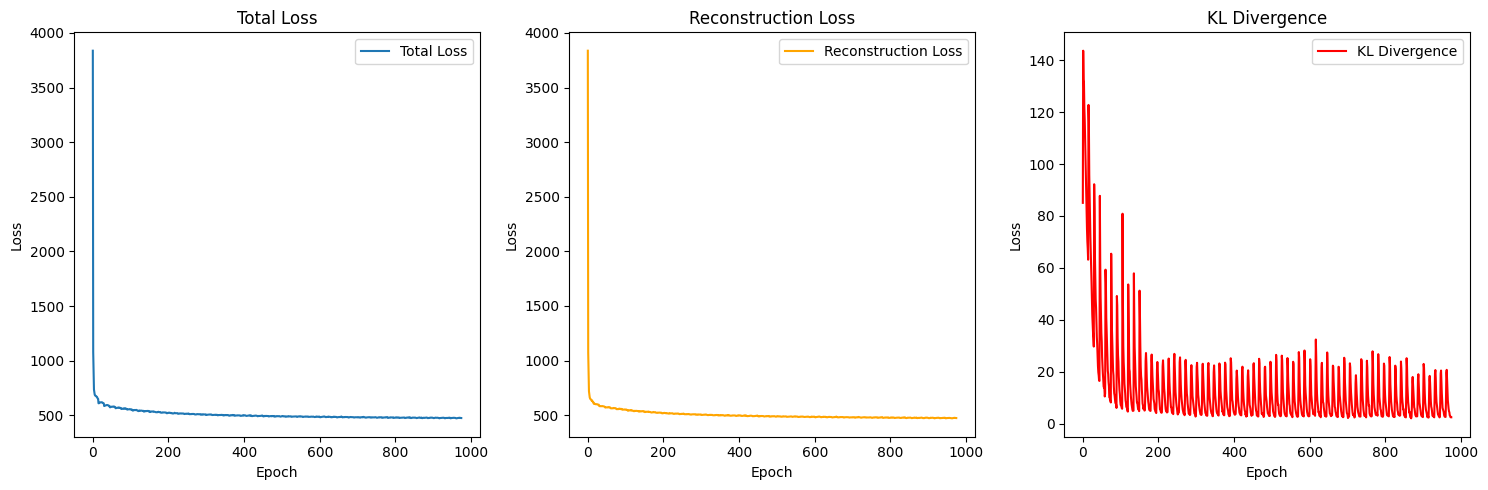

In [16]:
for i in range(300):
    model.train(EPOCHS)
    model.save()
    
model.plot_losses()

In [20]:
# test training results
from osu.rulesets.mods import Mods
import osu.rulesets.beatmap as bm
import osu.dataset as dataset

test_name = '1hope'
test_mods = 0
test_map_path = f'assets/{test_name}_map.osu'
test_song = f'assets/{test_name}_song.mp3'

test_map = bm.load(test_map_path)
test_map.apply_mods(test_mods)

data = dataset.input_data(test_map)
data = np.reshape(data.values, (-1, dataset.BATCH_LENGTH, len(dataset.INPUT_FEATURES)))
data = torch.FloatTensor(data)

Turning beatmaps into time series data: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


In [21]:
replay_data = vae.generate(data)
    
replay_data = np.concatenate(replay_data)
replay_data = np.pad(replay_data, ((0, 0), (0, 2)), mode='constant', constant_values=0)
if not os.path.exists('.generated'):
    os.makedirs('.generated')
    
print(f"Generated replay data shape: {replay_data.shape}")


Generated replay data shape: (10240, 4)


In [22]:
import osu.preview.preview as preview

preview.preview_replay_raw(replay_data, test_map_path, test_mods, test_song)